# Context

It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements.

Clearly, they aren't buying home because they are buying too much Avocado Toast!

But maybe there's hope… if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.



In [376]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
from chart_studio.plotly import iplot
import plotly.graph_objs as go
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import itertools 
import statsmodels.api as sm
#warnings.filterwarnings("ignore")

https://www.machinelearningplus.com/time-series/time-series-analysis-python/<br>
https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b<br>
https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/<br>

# Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:


The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.


Some relevant columns in the dataset:

Date - The date of the observation <br>
AveragePrice - the average price of a single avocado <br>
type - conventional or organic <br>
year - the year <br>
Region - the city or region of the observation <br>
Total Volume - Total number of avocados sold <br>
4046 - Total number of avocados with PLU 4046 sold <br>
4225 - Total number of avocados with PLU 4225 sold <br>
4770 - Total number of avocados with PLU 4770 sold <br>

In [369]:
path = os.getcwd()
print(path)
data= pd.read_csv('avocado.csv')

/Users/anjalisingh/Desktop/github_repos/Geron


In [367]:
data.head()
data.describe()
data.reset_index(inplace=True)
# convert Date to a proper datetime type
data["Datetime"] = pd.to_datetime(data["Date"], format="%m/%d/%y")
data = data.sort_values(by="Datetime")

In [308]:
data.columns

Index(['index', 'Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046',
       '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'type', 'year', 'region', 'Datetime'],
      dtype='object')

In [309]:
data['year'] = [d.year for d in data.Datetime]
data['month'] = [d.month for d in data.Datetime]
data['weekday'] = data['Datetime'].dt.day

In [310]:
data_US = data[data['region']=='TotalUS']

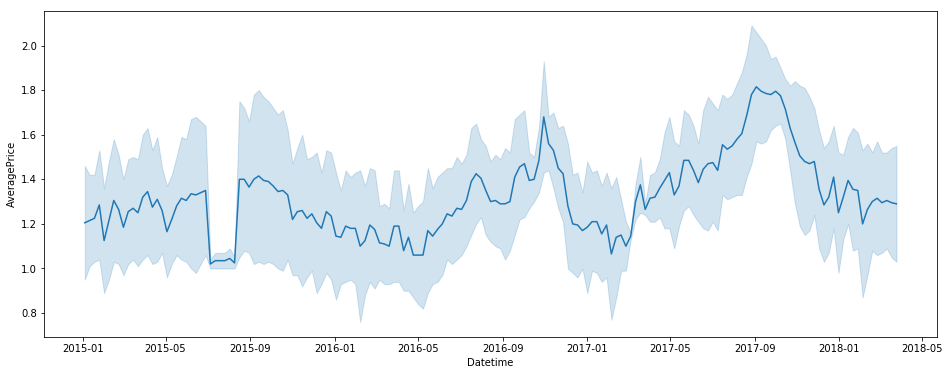

In [311]:
plt.figure(figsize=(16,6))
sns.lineplot(x="Datetime", y="AveragePrice", data=data_US)

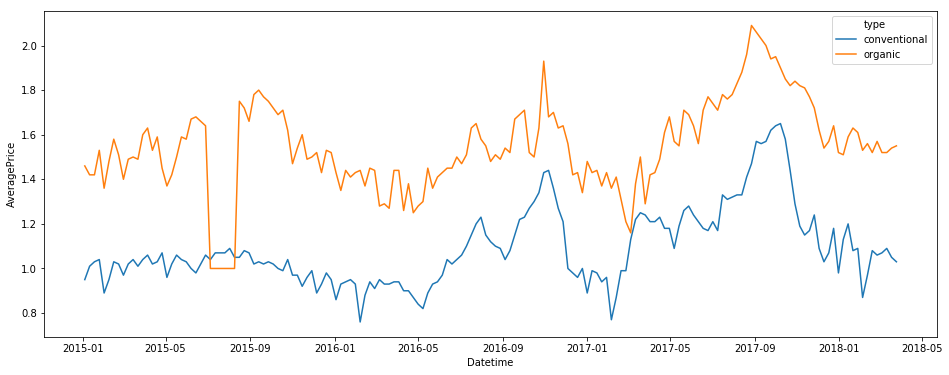

In [312]:
plt.figure(figsize=(16,6))
sns.lineplot(x="Datetime", y="AveragePrice", data=data_US, hue='type')

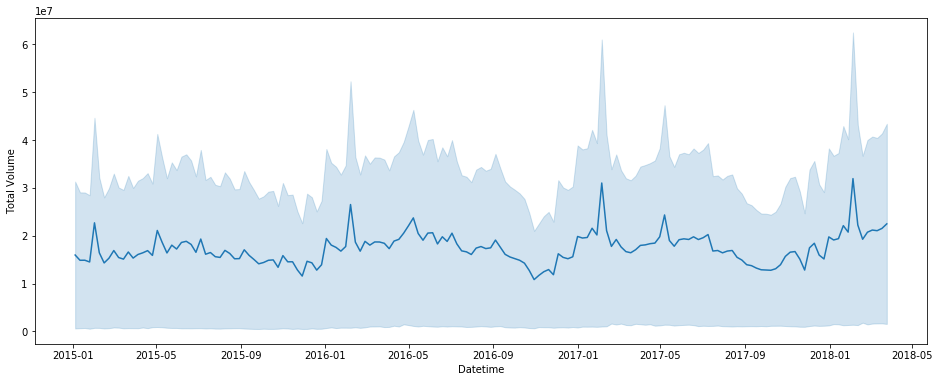

In [313]:
plt.figure(figsize=(16,6))
sns.lineplot(x="Datetime", y="Total Volume", data=data_US)

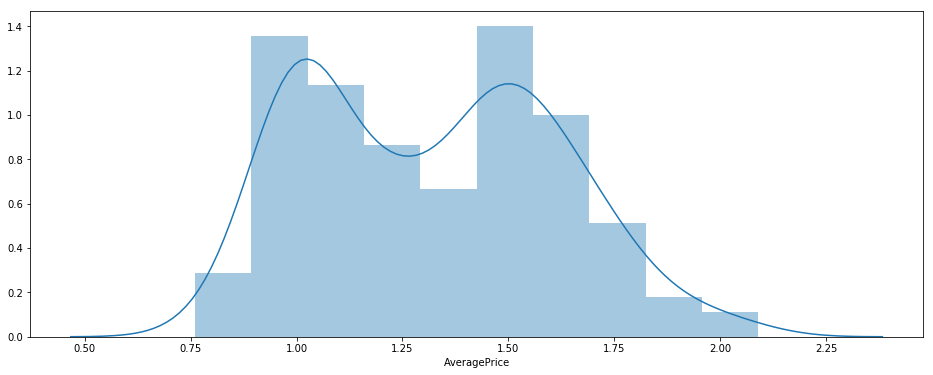

In [314]:
plt.figure(figsize=(16,6))
sns.distplot(data_US['AveragePrice'])

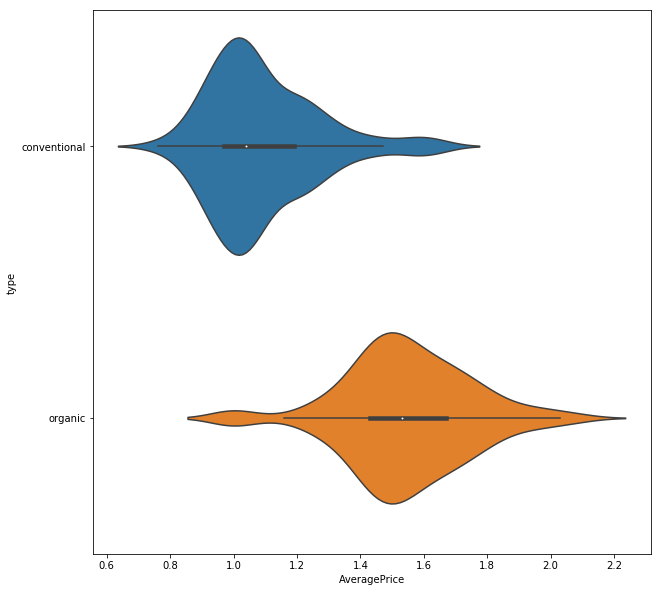

In [315]:
sns.violinplot(x='AveragePrice',y='type',data=data_US)

In [316]:
temp = data_US[["4046","4225","4770", "Datetime"]]
temp_melt = pd.melt(temp, id_vars=["Datetime"], value_vars=["4046","4225","4770"], value_name="Volume", var_name="PLU")

In [317]:
temp_melt.describe()
temp_melt['PLU'].value_counts()

4046    338
4770    338
4225    338
Name: PLU, dtype: int64

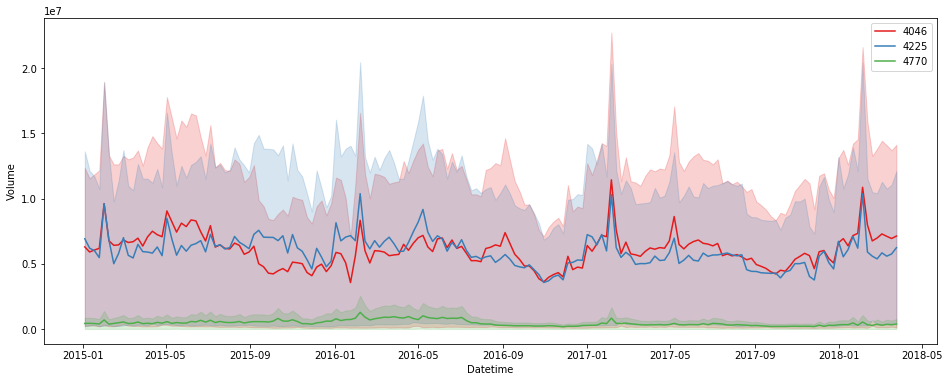

In [318]:
plt.figure(figsize=(16,6))
sns.lineplot(x="Datetime", y="Volume",hue=temp_melt.PLU.values, palette=sns.color_palette("Set1", temp_melt.PLU.nunique()),data=temp_melt)

In [319]:
temp_b = data_US[["Small Bags","Large Bags","XLarge Bags", "Datetime"]]

In [320]:
temp_bags = pd.melt(temp_b, id_vars=["Datetime"], value_vars=["Small Bags","Large Bags","XLarge Bags"], value_name="Volume", var_name="Bag Size")

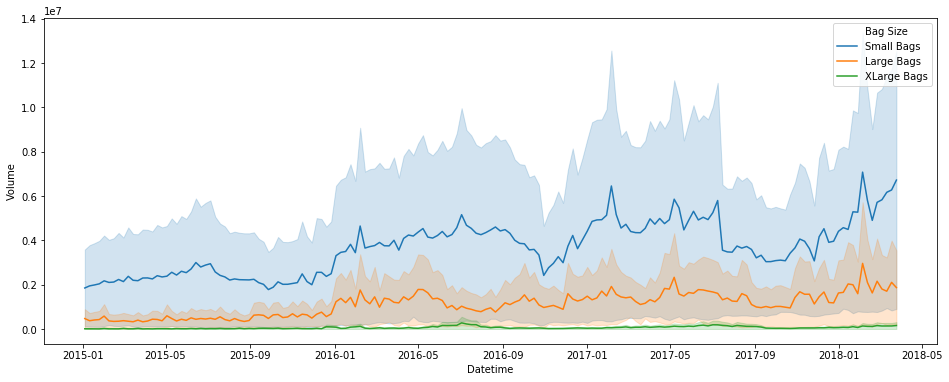

In [321]:
plt.figure(figsize=(16,6))
sns.lineplot(x="Datetime", y="Volume",hue=temp_bags['Bag Size'],data=temp_bags)

[Text(0, 0, 'Southeast'),
 Text(0, 0, 'Chicago'),
 Text(0, 0, 'HarrisburgScranton'),
 Text(0, 0, 'Pittsburgh'),
 Text(0, 0, 'Boise'),
 Text(0, 0, 'WestTexNewMexico'),
 Text(0, 0, 'LosAngeles'),
 Text(0, 0, 'LasVegas'),
 Text(0, 0, 'Atlanta'),
 Text(0, 0, 'DallasFtWorth'),
 Text(0, 0, 'MiamiFtLauderdale'),
 Text(0, 0, 'Plains'),
 Text(0, 0, 'StLouis'),
 Text(0, 0, 'Syracuse'),
 Text(0, 0, 'Midsouth'),
 Text(0, 0, 'Sacramento'),
 Text(0, 0, 'Boston'),
 Text(0, 0, 'Charlotte'),
 Text(0, 0, 'Spokane'),
 Text(0, 0, 'Albany'),
 Text(0, 0, 'Houston'),
 Text(0, 0, 'SouthCarolina'),
 Text(0, 0, 'SanFrancisco'),
 Text(0, 0, 'TotalUS'),
 Text(0, 0, 'RaleighGreensboro'),
 Text(0, 0, 'BuffaloRochester'),
 Text(0, 0, 'NorthernNewEngland'),
 Text(0, 0, 'GrandRapids'),
 Text(0, 0, 'Denver'),
 Text(0, 0, 'SanDiego'),
 Text(0, 0, 'BaltimoreWashington'),
 Text(0, 0, 'Roanoke'),
 Text(0, 0, 'RichmondNorfolk'),
 Text(0, 0, 'Northeast'),
 Text(0, 0, 'SouthCentral'),
 Text(0, 0, 'GreatLakes'),
 Text(0, 0, 'L

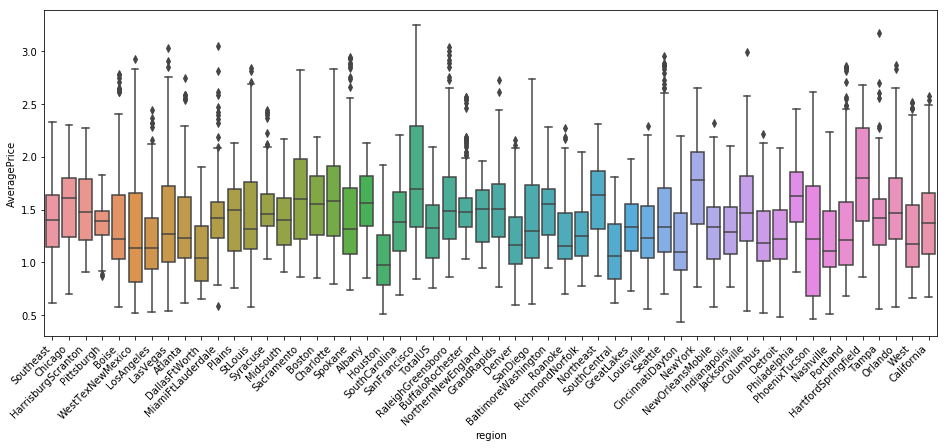

In [322]:
plt.figure(figsize=(16,6))
g = sns.boxplot(x="region", y="AveragePrice", data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

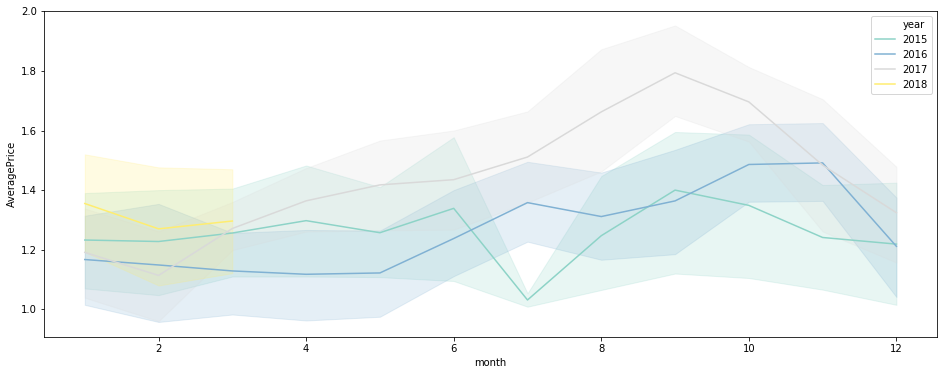

In [323]:
plt.figure(figsize=(16,6))
sns.lineplot(x="month", y="AveragePrice",hue='year', palette='Set3',data=data_US)

In [324]:
from statsmodels.tsa.seasonal import seasonal_decompose
data_US.index = data_US.Datetime
data_US.head()

,index,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Datetime,month,weekday
Datetime,,,,,,,,,,,,,,,,,,
2015-01-04,2703,51,1/4/15,0.95,31324277.73,12357161.34,13624083.05,844093.32,4498940.02,3585321.58,894945.63,18672.81,conventional,2015,TotalUS,2015-01-04,1,4
2015-01-04,11829,51,1/4/15,1.46,612910.15,233286.13,216611.20,4370.99,158641.83,115068.71,43573.12,0.00,organic,2015,TotalUS,2015-01-04,1,4
2015-01-11,11828,50,1/11/15,1.42,669528.88,270966.74,260971.60,3830.42,133760.12,106844.49,26915.63,0.00,organic,2015,TotalUS,2015-01-11,1,11
2015-01-11,2702,50,1/11/15,1.01,29063542.75,11544810.53,12134773.38,866574.66,4517384.18,3783261.16,718333.87,15789.15,conventional,2015,TotalUS,2015-01-11,1,11
2015-01-18,11827,49,1/18/15,1.42,713120.00,254319.58,311811.01,4020.85,142968.56,101850.23,41118.33,0.00,organic,2015,TotalUS,2015-01-18,1,18


Any time series may be split into the following components: Base Level + Trend + Seasonality + Error
    

A trend is observed when there is an increasing or decreasing slope observed in the time series. Whereas seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.

However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality. The opposite can also be true.

So, a time series may be imagined as a combination of the trend, seasonality and the error terms.


Another aspect to consider is the cyclic behaviour. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. Care should be taken to not confuse ‘cyclic’ effect with ‘seasonal’ effect.

So, How to diffentiate between a ‘cyclic’ vs ‘seasonal’ pattern?

If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

# Additive and Multiplicative time series

Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components:

Additive time series:
Value = Base Level + Trend + Seasonality + Error

Multiplicative Time Series:
Value = Base Level x Trend x Seasonality x Error

In [325]:
y = data_US['AveragePrice'].resample('W').mean()
result_mul = seasonal_decompose(x=y, model='multiplicative',extrapolate_trend='freq')

result_mul1 = seasonal_decompose(x=y, model='additive',extrapolate_trend='freq')

<Figure size 1152x432 with 0 Axes>

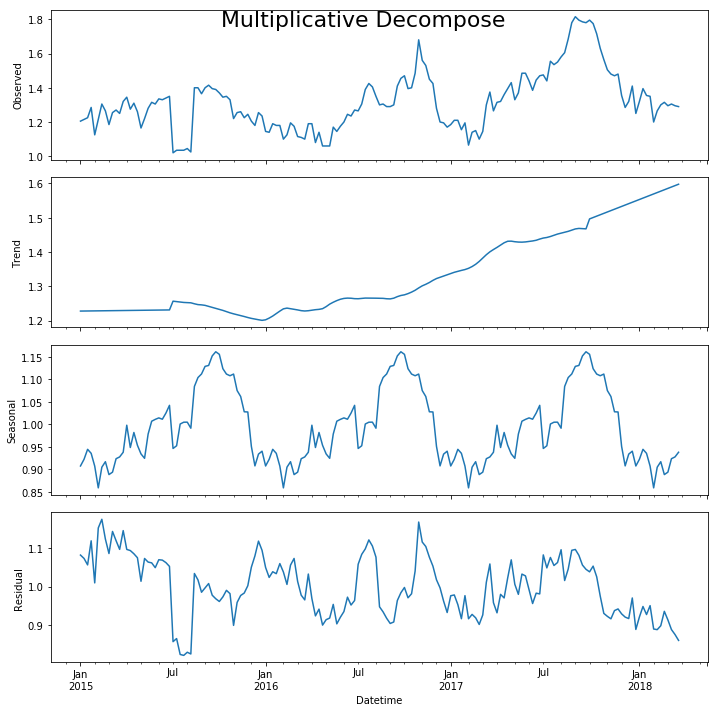

In [361]:
plt.figure(figsize=(16,6))
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
plt.show()

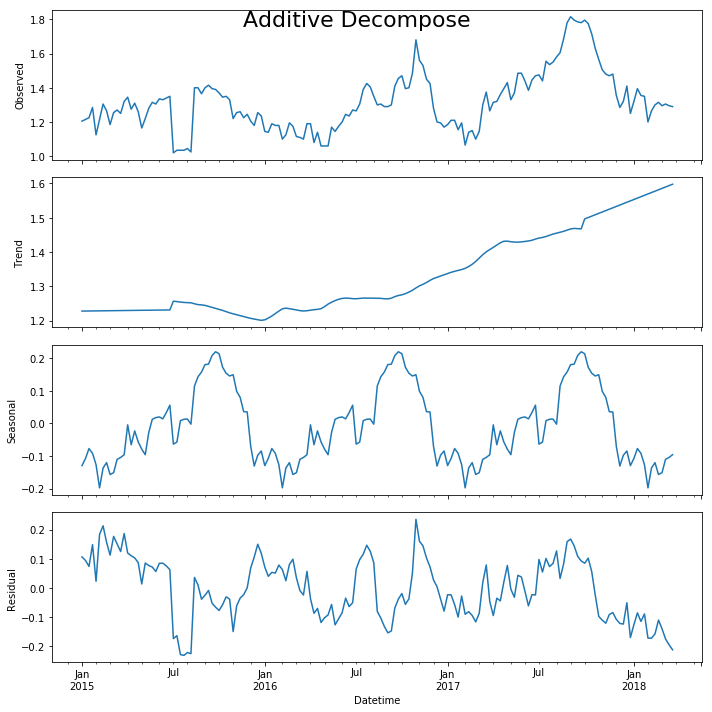

In [327]:
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul1.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

Which to choose?

We look at the residuals - the residuals are supposed to be random, devoid of any seasonality or patterns. The residual which is random, that decomposition is chosen.

#checking for stationairity in the data

Stationarity is a property of a time series. A stationary series is one where the values of the series is not a function of time.

The first step in the forecasting process is typically to do some transformation to convert a non-stationary series to stationary.

## How to make time series stationary ? 


You can make series stationary by:

1) Differencing the Series (once or more) <br>
2) Take the log of the series <br>
3) Take the nth root of the series <br>
4) Combination of the above <br>

## Why make a non-stationary series stationary before forecasting?
Forecasting a stationary series is relatively easy and the forecasts are more reliable.

An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.

We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

## How to test for stationarity?

The stationarity of a series can be established by looking at the plot of the series like we did earlier.

Another method is to split the series into 2 or more contiguous parts and computing the summary statistics like the mean, variance and the autocorrelation. If the stats are quite different, then the series is not likely to be stationary.

Nevertheless, you need a method to quantitatively determine if a given series is stationary or not. This can be done using statistical tests called ‘Unit Root Tests’. There are multiple variations of this, where the tests check if a time series is non-stationary and possess a unit root.

There are multiple implementations of Unit Root tests like:

Augmented Dickey Fuller test (ADH Test)
Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
Philips Perron test (PP Test)
The most commonly used is the ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary. So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis.

The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADH test

In [328]:
from statsmodels.tsa.stattools import adfuller, kpss

In [329]:
# ADF Test
result = adfuller(data_US.AveragePrice.values)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.260467512863907
p-value: 0.1850350247224003
Critial Values:
   1%, -3.4503224123605194
Critial Values:
   5%, -2.870338478726661
Critial Values:
   10%, -2.571457612488522


The p-value is more than 0.05, so we cannot reject the null hypothesis, that means the time series is non-stationary.

In [330]:
# KPSS Test
result = kpss(data_US.AveragePrice.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 0.677086
p-value: 0.015629
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


The p-value is less than 0.05, then we reject the null hypothesis, that means that the time series is non-stationary. 

## Estimating & Eliminating Trend

One of the first tricks to reduce trend can be transformation. For example, in this case we can clearly see that the there is a significant positive trend. So we can apply transformation which penalize higher values more than smaller values.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



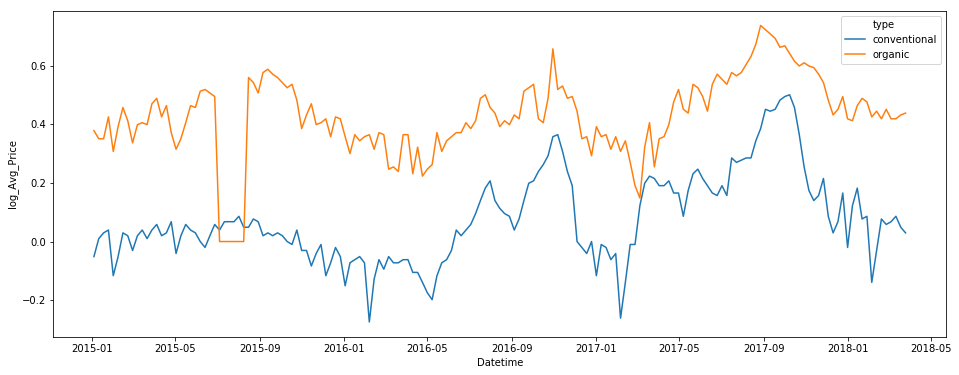

In [362]:
data_US['log_Avg_Price'] = np.log(data_US['AveragePrice'])
data_US[["AveragePrice","log_Avg_Price","Datetime"]]
plt.figure(figsize=(16,6))
sns.lineplot(x="Datetime", y="log_Avg_Price",hue='type', data=data_US)

## Moving average

In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 1 year, i.e. last 12 values. Pandas has specific functions defined for determining rolling statistics.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



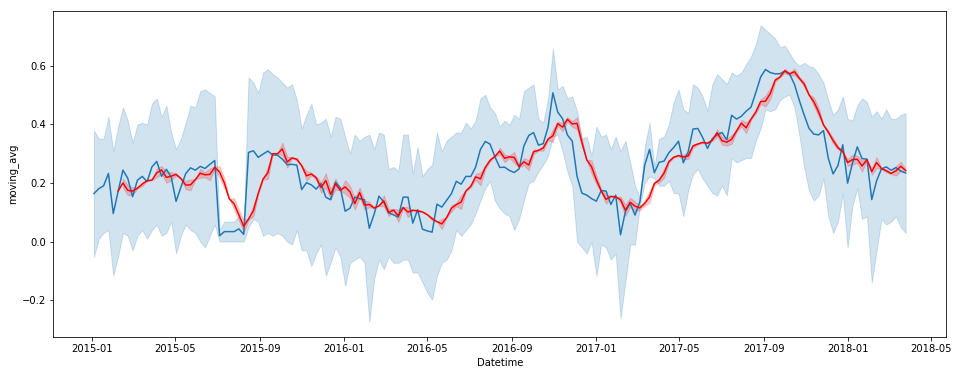

In [363]:
data_US['moving_avg'] = data_US['log_Avg_Price'].rolling(12).mean()
plt.figure(figsize=(16,6))
sns.lineplot(x="Datetime", y="log_Avg_Price", data=data_US)
sns.lineplot(x="Datetime", y='moving_avg',color='red',data=data_US)


#moving_avg = data_US['log_Avg_Price'].rolling(12).mean()

In [353]:
ts_log_moving_avg_diff = data_US['log_Avg_Price'] - data_US['moving_avg']
ts_log_moving_avg_diff.head()

Datetime
2015-01-04   NaN
2015-01-04   NaN
2015-01-11   NaN
2015-01-11   NaN
2015-01-18   NaN
dtype: float64

In [354]:
ts_log_moving_avg_diff.dropna(inplace=True)

In [355]:
result = adfuller(ts_log_moving_avg_diff)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -6.1100618280941035
p-value: 9.37963248906606e-08
Critial Values:
   1%, -3.4508226600665037
Critial Values:
   5%, -2.870558121868621
Critial Values:
   10%, -2.571574731684734


In [358]:
rolmean = ts_log_moving_avg_diff.rolling(12).mean()
rolstd = ts_log_moving_avg_diff.rolling(12).std()
rolvar = ts_log_moving_avg_diff.rolling(12).std()**2

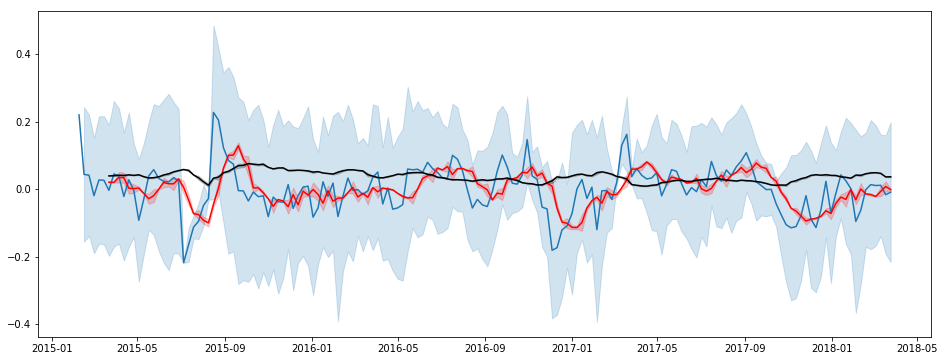

In [364]:
plt.figure(figsize=(16,6))
sns.lineplot(data=ts_log_moving_avg_diff)
sns.lineplot(data=rolmean,color='red')
#sns.lineplot(data=rolstd,color='yellow')
sns.lineplot(data=rolvar,color='black')

This looks like a much better series. The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series.

# Forecasting a Time Series

In [372]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [377]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:574.7706589666867
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:379.98713766096535
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-37.82104318281073
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-66.39543865659965
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-37.253152757642525
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-99.24480969853639


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-36.755872863605944
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-60.61678805704304
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:354.06753166492103
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:195.08163050442084
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-159.0424632553587
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-188.30537246178147
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-160.60905564947802
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-224.1333185981925
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-162.0701792821771
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-186.33503301380128
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-407.6531465354216
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-377.4814576872351
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-261.7333330278923


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-318.3480194948721
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-380.7509926185503
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-375.482115170601
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-279.12489726873434
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-315.34070560120847
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-402.64984951003953
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-373.1078174310352
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-257.67605388762377
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-325.45219416775467
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-378.8788133872649
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-371.10806979975655
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-277.1478312807932
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:-318.8365228531411
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:-409.1556806594833
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:-378.94008725952904
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-271.9401909984408
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:-325.2536045078146
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-378.

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-316.39002442358867
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-375.52137028458384
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-373.59088275947823
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-274.18401144662937
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-313.62739038367357
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-401.3123036857165
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-371.49333750306016
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-255.68145793208464
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-323.6862721719966
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-373.58389225996143
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-370.67484179316057
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-274.33799022572293
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-317.293044057653


The above output suggests that SARIMAX(1, 0, 0)x(0, 0, 0, 12) yields the lowest AIC value of -409.155. Therefore we should consider this to be optimal option.

In [448]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 0, 0),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       1.0149      0.002    440.193      0.000       1.010       1.019
ma.S.L12      -1.0000    470.944     -0.002      0.998    -924.033     922.033
sigma2         0.0243     11.464      0.002      0.998     -22.445      22.494


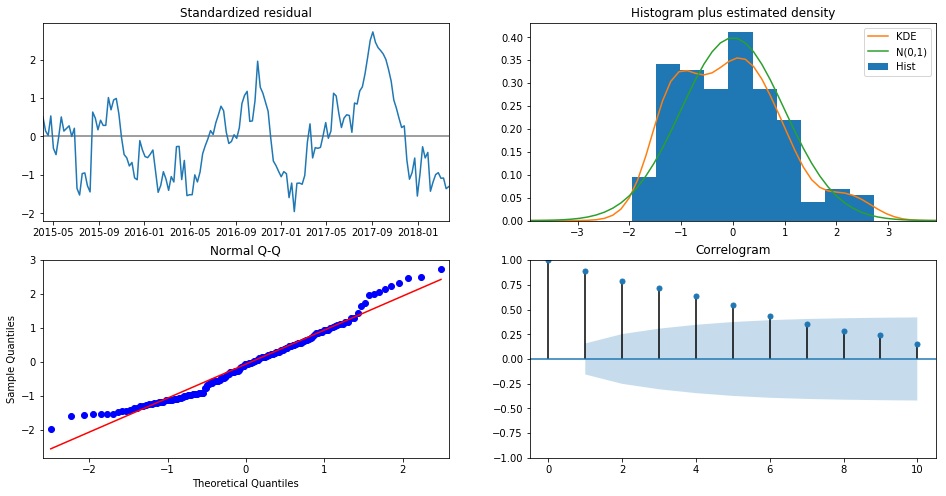

In [449]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

# Validating forecasts

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

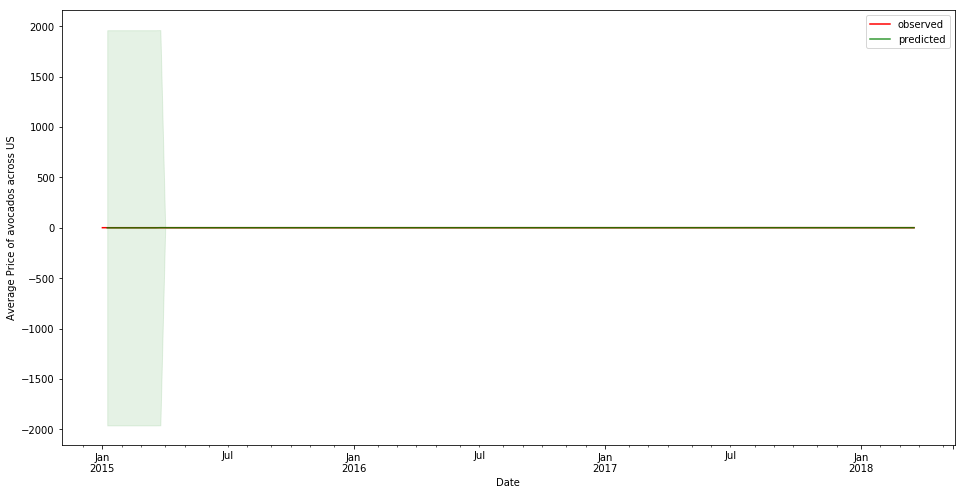

In [450]:
# to assess our fit, we compare predicted values to observed values

# get predictions and confidence intervals
pred = results.get_prediction(start=pd.to_datetime('2015-01-11'), dynamic=False)
pred_ci = pred.conf_int()

# plot the observed data
ax = y['2015':].plot(label='observed', color="red")

# plot the predictions
pred.predicted_mean.plot(ax=ax, label='predicted', color="green", alpha=.8, figsize=(16, 8))

# plot the confidence intervals for predictions
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='green', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel('Average Price of avocados across US')
plt.legend()

plt.show()

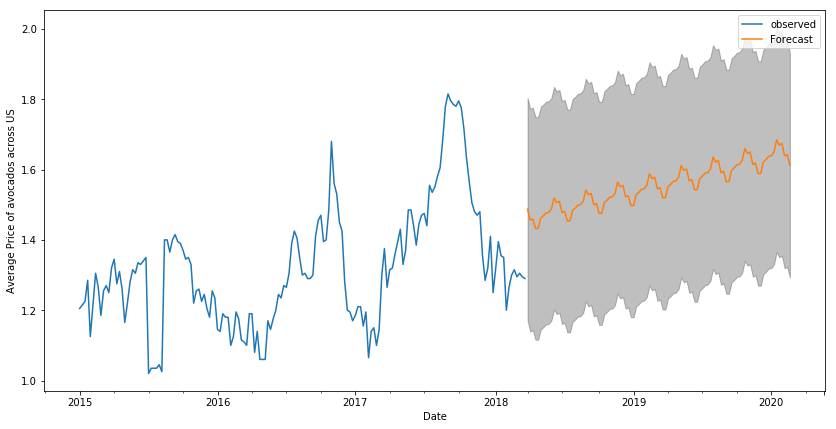

In [451]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Average Price of avocados across US')
plt.legend()
plt.show()